<a href="https://colab.research.google.com/github/DSGP-Group-1-EAPS/BackupDataset/blob/Thedin/thedinarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split




In [ ]:
# Specify the file path
!ls -l $file_path
file_path = 'preprocessed_data.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(df.head())


total 6084
-rw-r--r-- 1 root root 6222860 Feb 19 02:30 preprocessed_data.xlsx
drwxr-xr-x 1 root root    4096 Feb 14 14:28 sample_data
        Date    Shift   Code          Department Absenteeism Type    Status  \
0 2021-12-01  Shift A  AA369  Team - MAT 4A - BD         Informed  Notified   
1 2021-12-01  Shift A  AA362  Team - MAT 4A - BD         Informed  Notified   
2 2021-12-01  Shift A  AA359  Team - MAT 4A - BD         Informed  Notified   
3 2021-12-01  Shift A  AA541  Team - MAT 4A - BD         Informed  Notified   
4 2021-12-01  Shift A  AA398  Team - MAT 3A - BD         Informed  Notified   

   Leave Type Absent/Present     Reason Joined Date  DaysWorked  DayOfWeek  \
0           1            MAT  Maternity  2015-09-11        2273          3   
1           1            MAT  Maternity  2018-11-14        1113          3   
2           1            MAT  Maternity  2019-10-09         784          3   
3           1            MAT  Maternity  2020-10-02         425          3   
4

In [ ]:

from datetime import datetime

#print("Year of the absent date:", Year)
absent_dates = df['Date']

# Iterate through each date and extract the year
for date_string in absent_dates:
    date_obj = pd.to_datetime(date_string)  # Convert string to datetime object
    Year = date_obj.year

df['Year'] = pd.to_datetime(df['Date']).dt.year

print(df)


            Date    Shift    Code                   Department  \
0     2021-12-01  Shift A   AA369           Team - MAT 4A - BD   
1     2021-12-01  Shift A   AA362           Team - MAT 4A - BD   
2     2021-12-01  Shift A   AA359           Team - MAT 4A - BD   
3     2021-12-01  Shift A   AA541           Team - MAT 4A - BD   
4     2021-12-01  Shift A   AA398           Team - MAT 3A - BD   
...          ...      ...     ...                          ...   
90552 2023-12-22  Shift A  AA3992  Sewing Team - 142A - I - BD   
90553 2023-12-22  Shift A  AA3659  Sewing Team - 140A - I - BD   
90554 2023-12-22  Shift A  AA3845           Team - MAT 1A - BD   
90555 2023-12-22  Shift A  AA3984           Team - MAT 4A - BD   
90556 2023-12-22  Shift A  AA4098           Team - MAT 4A - BD   

      Absenteeism Type    Status  Leave Type Absent/Present           Reason  \
0             Informed  Notified           1            MAT        Maternity   
1             Informed  Notified           1   

<ipython-input-25-e4334346eaca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['LeaveYear'] = df_filtered['Date'].dt.year
<ipython-input-25-e4334346eaca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['LeaveMonth'] = df_filtered['Date'].dt.month


            Date    Shift    Code                    Department  \
16    2021-12-01  Shift B  AA1740  Sewing Team - 157B - II - BD   
17    2021-12-01  Shift B   AA226  Sewing Team - 157B - II - BD   
18    2021-12-01  Shift B  AA1609   Sewing Team - 157B - I - BD   
19    2021-12-01  Shift A  AA2383   Sewing Team - 157A - I - BD   
20    2021-12-01  Shift B  AA1460   Sewing Team - 156B - I - BD   
...          ...      ...     ...                           ...   
90549 2023-12-22  Shift A  AA4072   Sewing Team - 102A - I - BD   
90550 2023-12-22  Shift A  AA3609   Sewing Team - 105A - I - BD   
90551 2023-12-22  Shift A  AA3658   Sewing Team - 142A - I - BD   
90552 2023-12-22  Shift A  AA3992   Sewing Team - 142A - I - BD   
90553 2023-12-22  Shift A  AA3659   Sewing Team - 140A - I - BD   

      Absenteeism Type        Status  Leave Type Absent/Present  \
16          Uninformed  Not Notified           1         Absent   
17            Informed      Notified           1         Abse

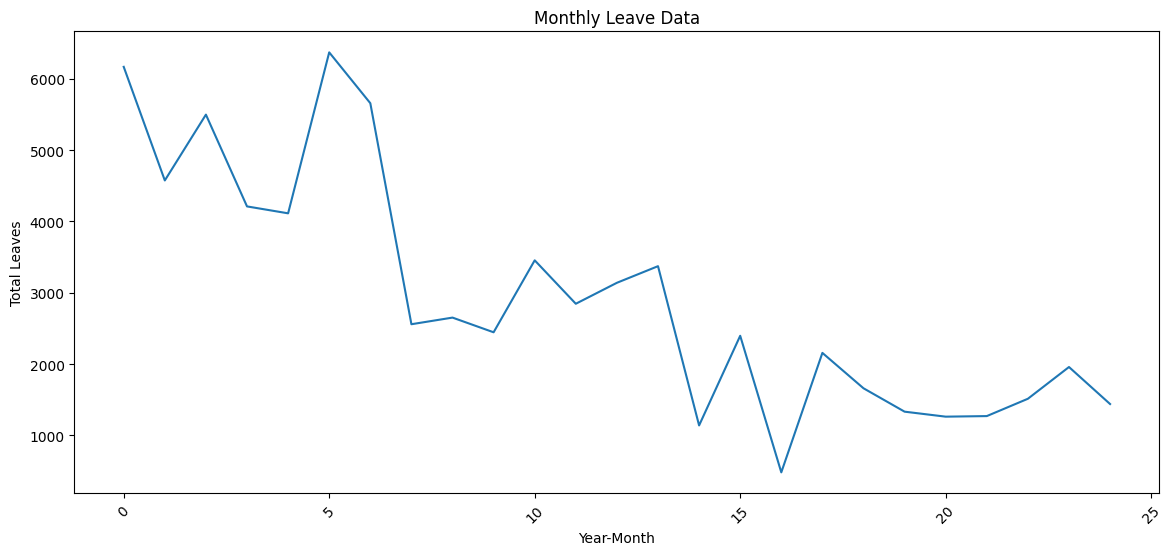

In [ ]:
df_filtered = df[(df['Encoded Reason'] != 11) & (df['Encoded Reason'] != 17)]
df_filtered['LeaveYear'] = df_filtered['Date'].dt.year
df_filtered['LeaveMonth'] = df_filtered['Date'].dt.month

# Display the filtered DataFrame
print(df_filtered)

leave_days_by_month = df_filtered.groupby(['LeaveYear', 'LeaveMonth']).size().reset_index(name='TotalLeaveDays')
print(leave_days_by_month)
monthly_leave = leave_days_by_month['TotalLeaveDays']

# Ensure 'Month' is formatted with leading zeros
#df_filtered['Month'] = df_filtered['Month'].apply(lambda x: '{:02}'.format(x))

# Create a new column 'year_month' representing the combined year and month
#df_filtered['year_month'] = df_filtered['Year'].astype(str) + '-' + df_filtered['Month'].astype(str)

# Aggregate data by year-month and sum the total leaves taken
#monthly_leave = df_filtered.groupby(['year_month']).sum().reset_index(name='TotalLeaveDays')

print(monthly_leave)
print(monthly_leave.shape)


# Plot the monthly leave data
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
plt.plot(monthly_leave)
plt.title('Monthly Leave Data')
plt.xlabel('Year-Month')
plt.ylabel('Total Leaves')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



In [ ]:
X = df.drop(columns=['TookLeaveNextMonth'])  # Features
y = df['TookLeaveNextMonth']  # Target variable

# Split the dataset into training and testing sets (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (54334, 19)
X_test shape: (36223, 19)
y_train shape: (54334,)
y_test shape: (36223,)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 3853219.577058505


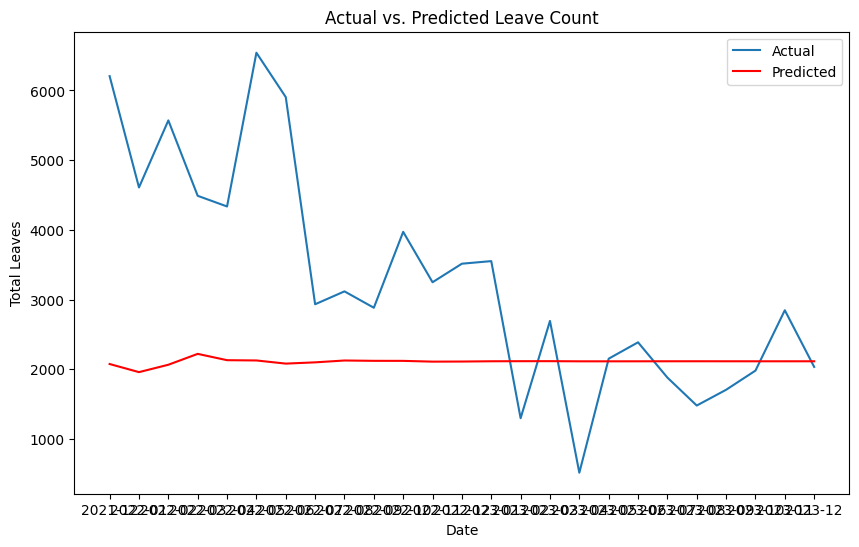

In [ ]:

daily_leave = df_filtered.groupby(['Month'])['TookLeaveNextMonth'].sum()
monthly_leave = df.groupby(['year_month'])['TookLeaveNextMonth'].sum()

# Fit the ARIMA model
model = ARIMA(monthly_leave, order=(4, 1, 0))  # Adjust order as needed
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(monthly_leave))

# Evaluate the model
mse = mean_squared_error(monthly_leave, predictions)
print('Mean Squared Error:', mse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(monthly_leave.index, monthly_leave, label='Actual')
plt.plot(monthly_leave.index, predictions, color='red', label='Predicted')
plt.title('Actual vs. Predicted Leave Count')
plt.xlabel('Date')
plt.ylabel('Total Leaves')
plt.legend()
plt.show()


In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, predictions)

# Calculate accuracy (inverse of MAPE)
accuracy = 100 - mape

print('Accuracy:', accuracy)


Accuracy: nan


<ipython-input-13-98d8a32d5357>:3: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
<ipython-input-13-98d8a32d5357>:3: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
